<a href="https://colab.research.google.com/github/maximealive/GoogleColab_GitHub/blob/master/Black_Jack_colab.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Mounted at /content/gdrive
Found 8021 images belonging to 13 classes.
Found 2909 images belonging to 13 classes.
  ...
    to  
  ['...']
  ...
    to  
  ['...']
Train for 1002 steps, validate for 363 steps
Epoch 1/2
1002/1002 [==============================] - 28s 28ms/step - loss: 2.2183 - accuracy: 0.1922 - val_loss: 2.3315 - val_accuracy: 0.1742
Epoch 2/2
1002/1002 [==============================] - 27s 27ms/step - loss: 1.7560 - accuracy: 0.3311 - val_loss: 2.2020 - val_accuracy: 0.2125
  ...
    to  
  ['...']
363/363 [==============================] - 7s 20ms/step - loss: 2.2020 - accuracy: 0.2125
  ...
    to  
  ['...']
  ...
    to  
  ['...']
Train for 1002 steps, validate for 363 steps
Epoch 1/2
1002/1002 [==============================] - 27s 27ms/step - loss: 1.5275 - accuracy: 0.4126 - val_loss: 2.0561 - val_accuracy: 0.2565
Epoch 2/2
1002/1002 [==============================] - 27s 27ms/step - loss: 1.3599 - accuracy: 0.4624 - val_loss: 2.0078 - val_accuracy: 0.2652
  

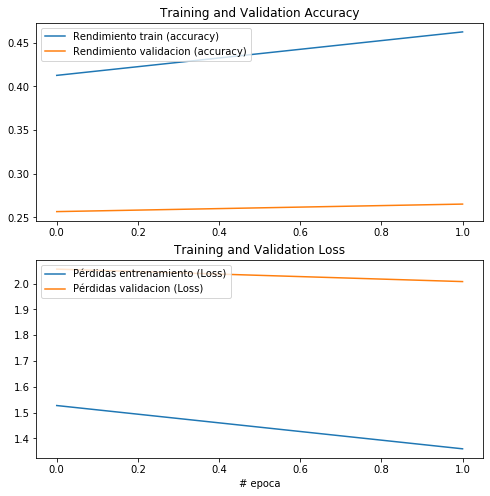

'\n#------------------------------------------------------------------------------#\n#                           9.Guardar resultados\n#------------------------------------------------------------------------------#\n\n#guardar el modelo de red obtenido\n#https://www.tensorflow.org/api_docs/python/tf/keras/Model\n#https://www.tensorflow.org/tutorials/keras/save_and_load\nos.chdir(dwld_dir)  \nsave_dir = dwld_dir + \'/my_models\'\nsubprocess.call(["mkdir","-p",save_dir])  # crear directorio para guardar modelo\nmodel.save(\n    save_dir,\n    overwrite=True,\n    include_optimizer=True,\n)\n'

In [6]:
#!kill -9 -1 .     # <- uncomment if you have some trouble and then
                   # comment before run the program again

# Run on GPU -> Runtime -> change runtime type -> 'Hardware acelerator' -> GPU
%tensorflow_version 2.x

import os, subprocess, time, pathlib
import numpy as np
import matplotlib.pyplot as plt
import tensorflow.keras.models as models
import tensorflow.keras.layers as layers
import tensorflow.keras.optimizers as optimizers

from __future__ import absolute_import, division, print_function, unicode_literals
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Conv2D, Flatten, Dropout, MaxPooling2D
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from google.colab import drive

# Montar Google Drive y crear carpetas
drive.mount('/content/gdrive', force_remount=True)

work_dir = '/content/work_dir'                    # local working directory(more faster)
subprocess.call(["mkdir","-p",work_dir])          # make working directory


# If the repository it's not present in 'work_dir' -> git clone ...
if not os.path.exists(work_dir + '/Black-Jack'):
  os.chdir(work_dir)

  # Use your github token to donwload repository:
  !git clone -l -s https://f10634844ffc26e300164f178226f80684e6cd92@github.com/maximealive/Black-Jack.git


os.chdir(work_dir + '/Black-Jack/images')



train_dir = pathlib.Path(work_dir + '/Black-Jack/images/train/')
test_dir = pathlib.Path(work_dir + '/Black-Jack/images/test/')

# Obtener etiquetas de clase y numero de clases
CLASS_NAMES = np.array([item.name for item in train_dir.glob('*')]) #clases son subdirectorios de '/train/'
NUM_CLASSES = len(CLASS_NAMES) # numero total de clases
IMG_HEIGHT = IMG_WIDTH = 32
#IMG_HEIGHT = IMG_WIDTH = np.array([32])
BATCH_SIZE = 8
IMG_CHANNELS = 3
LEARNING_RATE = 0.001 # factor de aprendizaje
EPOCHS = 2 # numero de epocas para entrenamiento

# Crear ImageDataGenerator convirtiendo de uint8 a float32 en el rango [0,1].
img_gen = tf.keras.preprocessing.image.ImageDataGenerator(rescale=1./255)

train_data_gen = img_gen.flow_from_directory(directory=str(train_dir),
                                                  target_size=(IMG_HEIGHT, IMG_WIDTH),
                                                  color_mode='rgb',                                                     
                                                  classes = list(CLASS_NAMES),
                                                  class_mode='categorical',
                                                  batch_size=BATCH_SIZE, shuffle=True)

test_data_gen = img_gen.flow_from_directory(directory=str(test_dir),
                                          target_size=(IMG_HEIGHT, IMG_WIDTH),
                                          color_mode='rgb',                                                     
                                          classes = list(CLASS_NAMES),
                                          class_mode='categorical',
                                          batch_size=BATCH_SIZE,
                                          shuffle=True)


# Define a model
def create_model():

  model = models.Sequential()
  model.add(layers.Conv2D(filters=6, 
                          kernel_size=(3, 3), 
                          strides = (1,1),
                          padding = 'valid',
                          activation='relu', 
                          input_shape=(IMG_HEIGHT,IMG_WIDTH,IMG_CHANNELS)))
  model.add(layers.AveragePooling2D())
  model.add(layers.Conv2D(filters=16, 
                          kernel_size=(3, 3),
                          strides = (1,1),
                          padding = 'valid', 
                          activation='relu'))
  model.add(layers.AveragePooling2D())
  model.add(layers.Flatten())
  model.add(layers.Dense(units=120, activation='relu'))
  model.add(layers.Dense(units=84, activation='relu'))
  model.add(layers.Dense(units=NUM_CLASSES, activation = 'softmax'))

  model.compile(optimizer=optimizers.Adam(lr=LEARNING_RATE),            
              loss='categorical_crossentropy',            
              metrics=['accuracy'])
  return model
  
# Create a basic model instance
model = create_model()

with tf.device('/GPU:0'):
  history = model.fit_generator(
      generator=train_data_gen,          
      steps_per_epoch=train_data_gen.n // BATCH_SIZE,      
      validation_data=test_data_gen,
      validation_steps=test_data_gen.n // BATCH_SIZE,
      epochs=EPOCHS,
      verbose=1,     
      use_multiprocessing = True,            
  )

with tf.device('/GPU:0'):
  test_loss, test_acc = model.evaluate_generator(generator=test_data_gen, 
                                                steps = test_data_gen.n // BATCH_SIZE, 
                                                verbose=1)
  
with tf.device('/GPU:0'):
  history = model.fit_generator(
      generator=train_data_gen,          
      steps_per_epoch=train_data_gen.n // BATCH_SIZE,      
      validation_data=test_data_gen,
      validation_steps=test_data_gen.n // BATCH_SIZE,
      epochs=EPOCHS,
      verbose=1,     
      use_multiprocessing = True,            
  )  
      

#------------------------------------------------------------------------------#
#                             7.Ejecucion de test
#------------------------------------------------------------------------------#

with tf.device('/GPU:0'):
  test_loss, test_acc = model.evaluate_generator(generator=test_data_gen, 
                                                 steps = test_data_gen.n // BATCH_SIZE, 
                                                 verbose=1)

#------------------------------------------------------------------------------#
#                        8.Visualización de resultados
#------------------------------------------------------------------------------#

# rendimiento
acc = history.history['accuracy']         #entrenamiento
val_acc = history.history['val_accuracy'] #validacion

# funcion de perdidas
loss = history.history['loss']            #entrenamiento
val_loss = history.history['val_loss']    #validacion

# Después pintamos los resultados:
plt.figure(figsize=(8, 8))
plt.subplot(2,1, 1)
plt.plot(range(EPOCHS), acc, label='Rendimiento train (accuracy)')
plt.plot(range(EPOCHS), val_acc, label='Rendimiento validacion (accuracy)')
plt.legend(loc='upper left')
plt.title('Training and Validation Accuracy')

plt.subplot(2,1, 2)
plt.plot(range(EPOCHS), loss, label='Pérdidas entrenamiento (Loss)')
plt.plot(range(EPOCHS), val_loss, label='Pérdidas validacion (Loss)')
plt.legend(loc='upper left')
plt.title('Training and Validation Loss')
plt.xlabel('# epoca')

plt.show()